In [4]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import sys
import os


scripts_dir = os.path.abspath('../scripts')
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

# Importar el archivo viztools.py
import viztools as v

# Al leer el archivo CSV que se matengan las modificaciones en los dtypes de dates
df = pd.read_csv("../data/superstore_clean.csv", parse_dates=['Order Date', 'Ship Date'])

In [11]:
# cargar cuando modifique las funciones o incluya nuevas
importlib.reload(v)

<module 'viztools' from '/Users/jaimeinchaurraga/Documents/GitHub/03_EDA_Superstore_23/scripts/viztools.py'>

# **Análisis Multivariante de Variables Categóricas vs Numéricas**

En esta sección se va a realizar un análsis gráfico entre variables categóricas. Primero se realizará una comprativa visual bivariante entre las combinaciones más interesantes desde el punto de vista de negocio  
que pueda servir como un primer punto de partida. En caso de encontrar alguna relación interesante, se continuará el análisis mediante tests matemáticos apropiados o incluso ampliado el análsis visual,  
haciendo uso de otras gráficas o incluyendo más variables categóricas.


# Índice

1. **Relación entre `Order Profitable` y Categóricas**  
    1.1 Relación entre `Category` vs `Order Profitable`  
    1.2 Relación entre `Segment` vs `Order Profitable`  
    1.3 Relación entre `Ship Mode` vs `Order Profitable`  
    1.4 Relación entre `Ship Status` vs `Order Profitable`  

2. Relación entre `Segment` vs `Ship Mode`  

3. Relación entre `Category` vs `Ship Mode`  

4. Relación entre `Segment` vs `Category`  

5. Relación entre `Ship Mode` vs `Ship Status`  

6. Análisis entre `State` vs variables categóricas clave  
    6.1 Relación entre `State` vs `Order Profitable`  
    6.2 Relación entre `State` vs `Ship Mode`  
    6.3 Relación entre `State` vs `Ship Status`  
    6.4 Relación entre `State` vs `Category`  
    6.5 Relación entre `State` vs `Segment`  



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Customer Name           9994 non-null   object        
 3   Order Date              9994 non-null   datetime64[ns]
 4   Order Profitable?       9994 non-null   object        
 5   Product Name            9994 non-null   object        
 6   Region                  9994 non-null   object        
 7   Segment                 9994 non-null   object        
 8   Ship Date               9994 non-null   datetime64[ns]
 9   Ship Mode               9994 non-null   object        
 10  Ship Status             9994 non-null   object        
 11  State                   9994 non-null   object        
 12  Sub-Category            9994 non-null   object  

In [10]:
df.head()

,Category,City,Customer Name,Order Date,Order Profitable?,Product Name,Region,Segment,Ship Date,Ship Mode,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,Claire Gute,2021-11-08,Profitable,Bush Somerset Collection Bookcase,South,Consumer,2021-11-11,Second Class,Shipped On Time,Kentucky,Bookcases,3,3,0.00,42,2,262,392
1,Furniture,Henderson,Claire Gute,2021-11-08,Profitable,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,Consumer,2021-11-11,Second Class,Shipped On Time,Kentucky,Chairs,3,3,0.00,220,3,732,1096
2,Office Supplies,Los Angeles,Darrin Van Huff,2021-06-12,Profitable,Self-Adhesive Address Labels for Typewriters b...,West,Corporate,2021-06-16,Second Class,Shipped Late,California,Labels,4,3,0.00,7,2,15,22
3,Furniture,Fort Lauderdale,Sean O'Donnell,2020-10-11,Unprofitable,Bretford CR4500 Series Slim Rectangular Table,South,Consumer,2020-10-18,Standard Class,Shipped Late,Florida,Tables,7,6,0.45,-383,5,958,1434
4,Office Supplies,Fort Lauderdale,Sean O'Donnell,2020-10-11,Unprofitable,Eldon Fold 'N Roll Cart System,South,Consumer,2020-10-18,Standard Class,Shipped Late,Florida,Storage,7,6,0.20,3,2,22,33


In [3]:
# Agrupar las variables categóricas y númericas para poder trabajar mejor 
categorical_columns = [
    'Category', 'City', 'Customer Name',
    'Order Profitable?', 'Product Name', 'Region', 'Segment',
    'Ship Mode', 'Ship Status', 'State', 'Sub-Category'
]

numerical_columns = [
    'Days to Ship Actual', 'Days to Ship Scheduled', 'Discount', 'Profit',
    'Quantity', 'Sales', 'Sales Forecast'
]
# Creo una nueva variable para agrupar las variables con datetime 
date_columns = [
    'Order Date','Ship Date'
]

## 1. **Relación entre `Discount` y Categóricas**  

**¿Existe alguna relación entre las variables categóricas y la aplicación de descuentos?**

In [39]:
# Vistazo rápido para ver todos los tipos de descuentos aplicados a productos. Destaca que no hay una gran cantidad diferente de descuentos y que la mayor parte de productos no se le han aplicado ninguno
df["Discount"].value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

### 1.1. **Relación entre `Category` vs `Discount`**  


In [36]:
# Tabla numérica que agrupa las tres categorías principales y sus medidas de tendencia central y dispersión
df.groupby("Category")["Discount"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,2121.0,0.173923,0.181547,0.0,0.0,0.2,0.3,0.7
Office Supplies,6026.0,0.157285,0.229495,0.0,0.0,0.0,0.2,0.8
Technology,1847.0,0.132323,0.141575,0.0,0.0,0.2,0.2,0.7


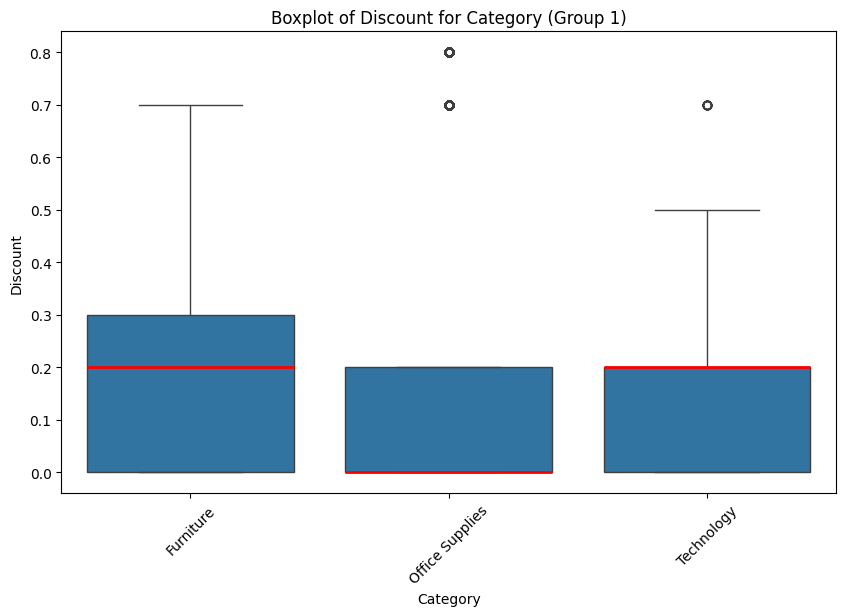

In [37]:
v.plot_grouped_plots(df, 'Category', 'Discount', plot_type='boxplot', median_color='red')


Como primer paso para analizar posibles relaciones entre ambas variables o patrones interesantes, resulta útil el boxplot.  
#### **Furniture**:
- **Mediana**: 20%, con un rango intercuartil de 10% a 30%.
- **Bigotes**: Se extienden de 0% a 70%.
- **Outliers**: Sin anomalías aparentes. La tabla anterior nos lo confirma al indicar que apenas hay std. Por lo tanto, no hay apenas dispersión

#### **Office Supplies**:
- **Mediana**: 0%, parece que un gran número de los productos de esta categoría no tienen descuentos. Mirar en más detalle.
- **Bigotes**: Desde 0% a 20%. Es decir, coinciden con los extremos de la caja central, por lo que indica que también hay un gran numero de valores agrupados aquí. Mirar en más detalle
- **Outliers**: Existen algunos valores atípicos por encima del 70%. Hay que mirarlo en más detalle ya que puede ser engañoso; podría dar la sensación de que se tratan de dos valores sueltos,  
pero tal vez se traten de mucho más valores que ocupan justo esos dos valores específicos de 0.7 y 0.8. Hay que recordar que la "gama" de descuentos no es muy "contínua" en el sentido de que hay pocos valores. Ver en detalle

#### **Technology**:
- **Mediana**: 20%
- **Bigotes**: Se extienden hasta aproximadamente el 50%.
- **Outliers**: Algunos casos llegana a descuentos de 50%. Mirar en detalle


#### **Conclusión y siguientes pasos**:  
Se han podido obtener insights interesantes que pueden indicar cierto grado de dependencia entre las variables. Aunque como se planteaba, siguen quedando dudas normalmente relacionadas con la distribución,   
por ello se va a hacer uso de herramientas complementarias de visualización.

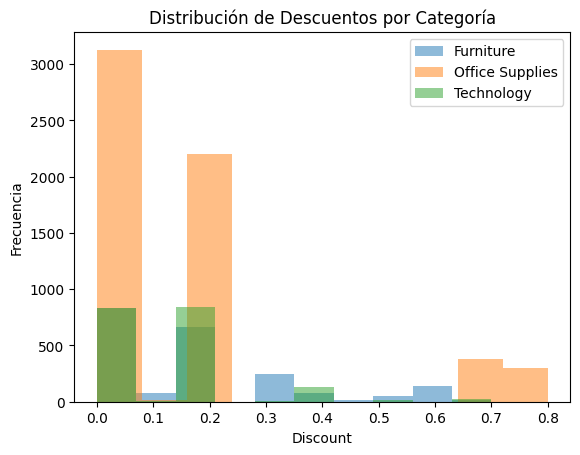

In [29]:


# Histogramas de los descuentos por categoría --> útil pero hay opciones mejores
'''
df.groupby('Category')['Discount'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribución de Descuentos por Categoría')
plt.xlabel('Discount')
plt.ylabel('Frecuencia')
plt.show()
'''

Aunque el histograma aporta información adicional, parece mejor idea buscar otras alternativas gráficas para la visualización. Vamos a ello.

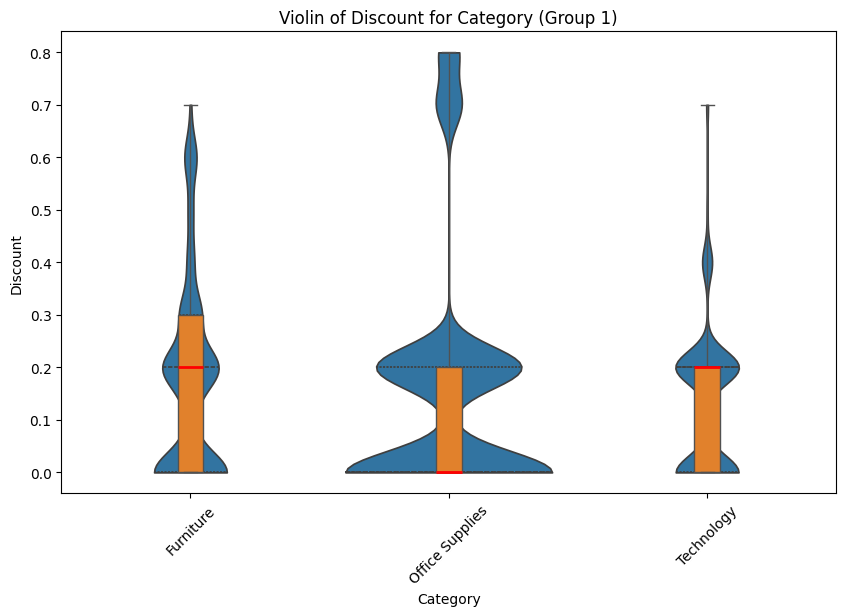

In [35]:
v.plot_grouped_plots(df, 'Category', 'Discount', plot_type='violin', median_color='red')


### Análisis del gráfico de violín:

La gráfica de violines proporciona una representación mucho más completa que las otras probadas previamente. Es especialmente útil porque no solo muestra la distribución y densidad de los valores, sino que también indica visualmente la cantidad de datos en cada categoría, gracias al grosor de los violines. Además, resalta de forma clara las zonas donde los datos están más concentrados.
Complementando el análisis del boxplot, aquí se puede ver cómo la densidad de los datos y la cantidad total de ellos varían entre las diferentes categorías, lo que nos da una mejor comprensión de la distribución de los descuentos.


#### **Furniture**:
- **Caja central**: Va del 0% al 30% de descuento. La **mediana** está marcada en el interior de la caja, alrededor del 20%.
- **Densidad**: Las zonas donde se ubican la mayor parte de los datos son en 0% y 20% (no parece haber productos con 10%) y en un segundo nivel en el rango entre 30% y 70%

#### **Office Supplies**:
- **Caja central**: Va de 0 al 20%. La **mediana** está efectivamente en 0%.
- **Densidad**: Aquí podemos ver claramente que la mayor parte de los valores están en el 0% de descuento, lo que se refleja en la gran anchura del violín en esa zona. Esto confirma la acumulación masiva de datos en torno a 0%. Este gráfico ayuda a visualizar,  
lo que el boxplot no mostraba; el boxplot mostrabaja la caja central pero aquí además se puede obervar claramente que la gran mayoría de los datos se encuentran en esta zona (y no solo el 50% que muestra la caja central en un boxplot)  
- **Outliers**: Los valores por encima del 70% y 80% que aparecían como outliers en el boxplot son visibles aquí también, y el gráfico sugiere que estos valores son más numerosos de lo que parecía.

#### **Technology**:
- **Caja central**: Va del 0% al 20%. La **mediana** está claramente marcada alrededor del 20%, similar a "Furniture".
- **Densidad**: La densidad de los descuentos es más concentrada alrededor de la caja central en dos secciones 0% y 20%. El value_counts ya nos indicaba que el 20% de descuento era la segunda opción más habitual en un producto en términos absolutos,  
 y aquí se confirtma. Esta gráfica nos permite también confirmar lo que ya vimos en el anáksis univariante; que "Office Supplies tiene más del 50% total de productos y las otras dos categorías tienen una densidad similar.
- **Outliers**: No se observan muchos outliers, lo que es consistente con el análisis anterior.

La teoría de que las variables son dependientes y por tanto de que guardan una correlación parece ser ser más evidente. Posteriormente se realizará algún test numérico que valide esta hipótesis.

### 1.2. **Relación entre `Segment` vs `Discount`**  


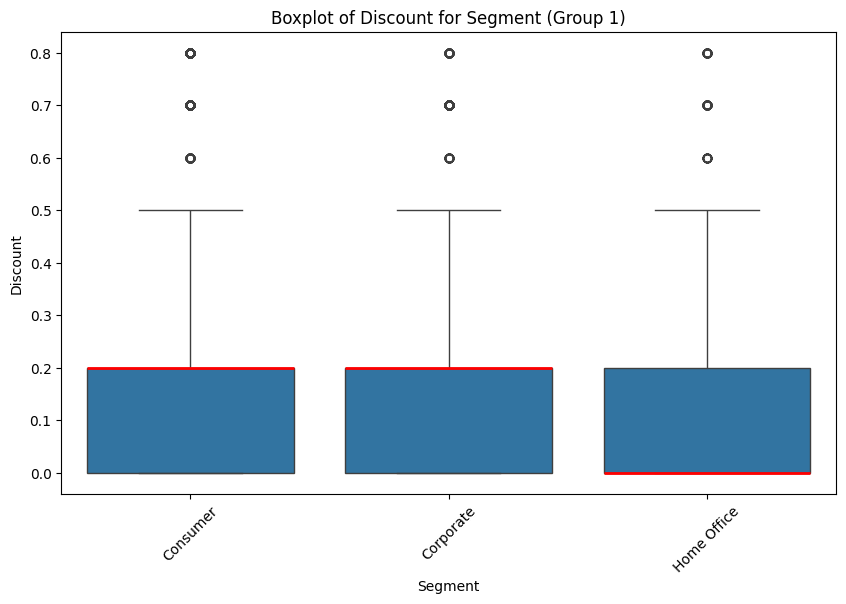

In [41]:
v.plot_grouped_plots(df, 'Segment', 'Discount', plot_type='boxplot', median_color='red')

Dada la estructura de los diferentes boxplots, que parecen ser prácticmanete iguales, indican que no hay patrones interesantes con los que seguir investigando y analizando.

### 1.3. **Relación entre `State` vs `Discount`**  


In [54]:
group_dis_st = df.groupby('State')['Discount'].value_counts(normalize=False)

# Convertir a un DataFrame para tener una vista más clara
group_dis_st = group_dis_st.rename('percentage').reset_index()

# Mostrar el resultado
print(group_dis_st)

             State  Discount  percentage
0          Alabama       0.0          61
1          Arizona       0.2         174
2          Arizona       0.7          41
3          Arizona       0.5           9
4         Arkansas       0.0          60
..             ...       ...         ...
96      Washington       0.2         162
97   West Virginia       0.0           3
98   West Virginia       0.3           1
99       Wisconsin       0.0         110
100        Wyoming       0.2           1

[101 rows x 3 columns]


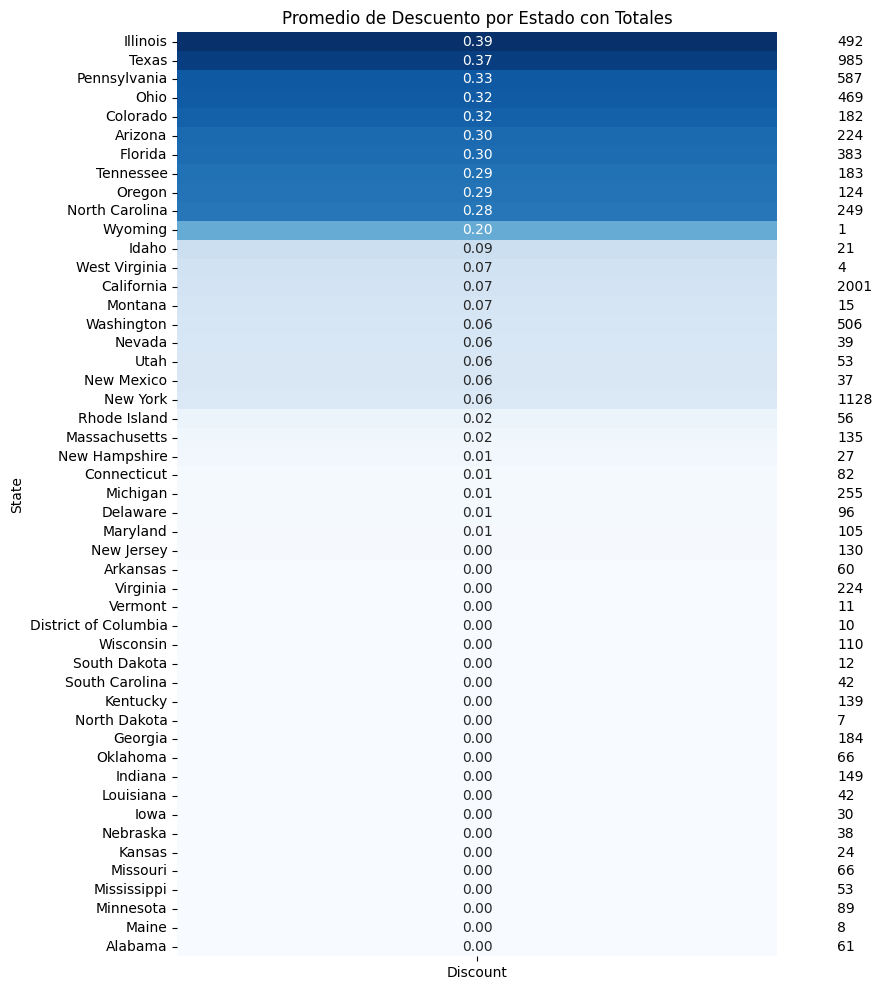

In [6]:
# Crear gráfiica que muestre el porcentaje promedio de descuentos en los diferentes estados 

# Crear una tabla pivote con los valores promedio de 'Discount' por 'State'
pivot_table = df.pivot_table(values='Discount', index='State', aggfunc='mean')

# Ordenar la tabla pivote en orden descendente según el descuento promedio
pivot_table_sorted = pivot_table.sort_values(by='Discount', ascending=False)

# Crear una tabla con el total de descuentos por estado (conteo de observaciones)
df_totals = df.groupby('State')['Discount'].count()

# Crear el heatmap
fig, ax = plt.subplots(figsize=(10, 12))  # Ajustar el tamaño para que entren todos los estados

# Graficar el heatmap sin la barra de color
sns.heatmap(pivot_table_sorted, cmap='Blues', annot=True, fmt=".2f", ax=ax, cbar=False)

# Añadir los totales a la derecha del gráfico
for i, total in enumerate(df_totals.loc[pivot_table_sorted.index]):
    ax.text(1.10, i + 0.5, f'{total}', va='center', ha='left', fontsize=10, color='black', transform=ax.get_yaxis_transform())

# Ajustar el espacio para las etiquetas
plt.subplots_adjust(left=0.3, right=0.9)

# Título del gráfico
plt.title('Promedio de Descuento por Estado con Totales')

# Mostrar el gráfico
plt.show()

A partir de la gráfica, se observan algunos patrones interesantes:

1. **Relación entre número de pedidos alto y el descuento promedio alto (PATRÓN RECURRENTE)**:  
   - Un patrón claro es que los estados con un descuento promedio más alto, representados en azul oscuro, tienen un **mínimo considerable de pedidos**. Por ejemplo, estados como **Illinois**, **Texas**, **Pennsylvania**, y **Ohio** tienen un descuento promedio superior al 30%, y   también tienen un número relativamente alto de pedidos (no bajan de **124 pedidos**).  
   - Este patrón sugiere que los estados con más pedidos podrían recibir mayores descuentos, ya sea porque estos estados son más competitivos o porque se utilizan más estrategias promocionales en estas zonas.  

2. **Casos con un gran número de pedidos pero con un descuento promedio bajo(CASOS AISLADOS)**:  
   - Existen algunos pocos casos como **California** y **New York**, que tienen un alto número de pedidos (más de 1000 en ambos casos) pero con un descuento promedio extremadamente bajo (alrededor del 0.06). Sería enterante entender por qué en estos casos se rompe con el patrón   anterior.

3. **Relación entre número de pedidos bajo y el descuento promedio bajo (PATRÓN RECURRENTE)**:  
   - La mayor parte de estados que tienen un número de pedidos relativamente bajo son aquellos que suelen tener la media de descuentos más baja, de hecho la mayoría es directamente 0. Además en términos absolutos se muestra que no se aplican descuentos en la mayor parte de los estados.  


En términos generales, parece que estas dos variables sí están correlacionadas. Además de ser útil hablar con negocio para entender las posibles razones de las diferencias de descuentos por los estados, será muy interesante hacer en el futuro, un análisis que relacione los pedidos y descuentos con las ventas y profit obtenido, y así tratar de entender si las estrategias aplicadas han funcionado bien y si hay alguna manera de mejorarlas






### 1.4. **Relación entre `Order Profitable?` vs `Discount`**  

In [8]:
df["Discount"].value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

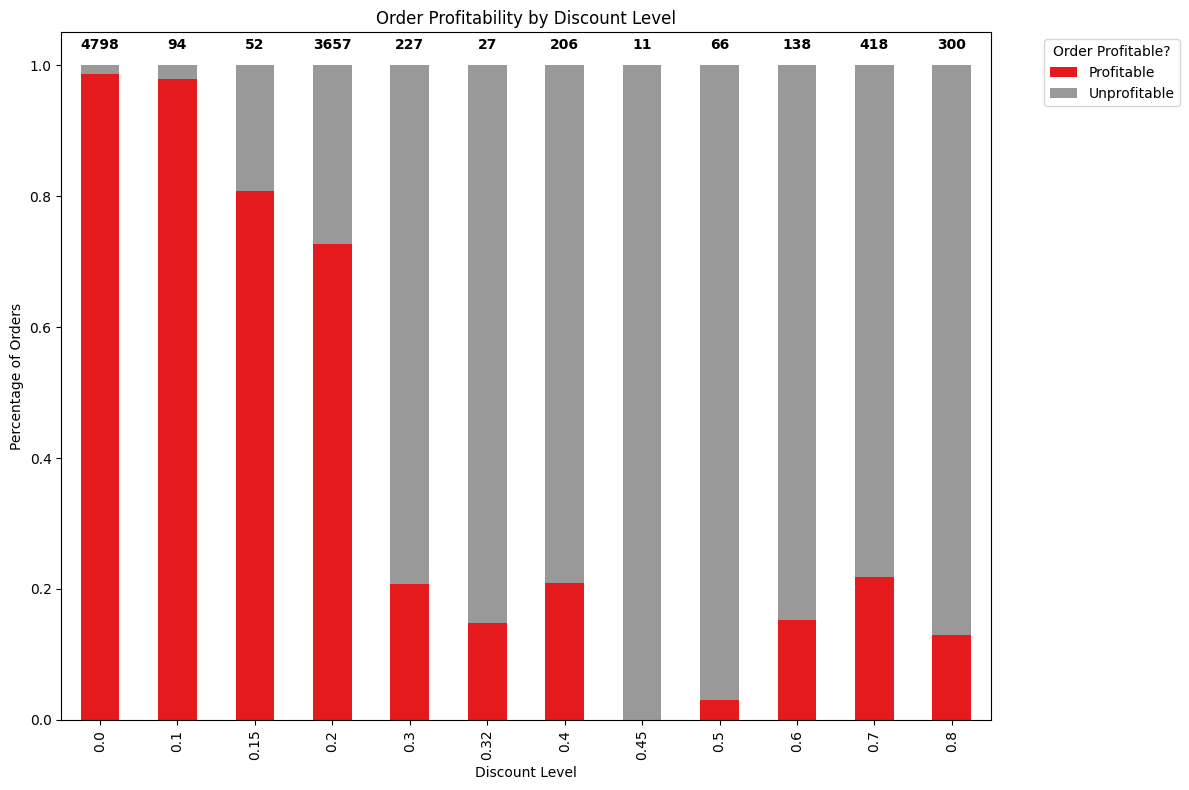

In [12]:
# Esta función muestra barras apiladas en de los diferentes tipos de descuento. Cuanta más porción de color rojo, más porcentaje de productos rentables
v.plot_order_profitability_by_discount(df, 'Discount', 'Order Profitable?')

### Análisis de la gráfica: Rentabilidad de pedidos según el nivel de descuento

Esta gráfica muestra la relación entre el **nivel de descuento aplicado** y la **rentabilidad** de los pedidos. Cada barra representa el porcentaje de pedidos rentables (*rojo*) y no rentables (*gris*) para un nivel de descuento específico. Además, el número total de pedidos para cada nivel de descuento se muestra en la parte superior de cada barra.

### Patrones observados:

1. **Tendencia clara en descuentos bajos (0.0 a 0.2)**:  
   - En los niveles de descuento más bajos (0.0 a 0.2), una gran mayoría de los pedidos son **rentables** (en rojo), con muy pocos pedidos no rentables. Esto indica que los pedidos que no tienen descuento o tienen un descuento mínimo suelen ser mayormente rentables.  
   - La rentabilidad más alta se observa cuando no se aplica ningún descuento (0.0), con más de 4700 pedidos en total.  
   - En términos absolutos, la mayor parte de los pedidos se encuentran en estos rangos. Especialmente en descuento de 0% y 20%

2. **Cambio de tendencia en descuentos moderados (0.3 a 0.4) y descuentos elevados (0.5 en adelante)**
   - A partir de un nivel de descuento de **0.3**, se empieza a ver una reducción notable en la rentabilidad. En este punto, **más de dos tercios** de los pedidos ya no son rentables.
   - Esto indica que un descuento del 30% o más comienza a afectar significativamente la rentabilidad de los pedidos, lo que podría deberse a la reducción de márgenes.  
   - En términos absolutos, existe una mayor dispersión de los datos según el descuento específico, pero en general hay mucha menos densidad en estas opciones de descuento (Lamayor s eencuentra en el descuento de 70% con casi 420 productos)  


### Insights de negocio interesantes:  

- **Tendencia a la pérdida de rentabilidad con descuentos altos**: La gráfica sugiere una clara **relación inversa entre el descuento y la rentabilidad**. Cuanto mayor es el descuento, menor es la rentabilidad, y esta tendencia se hace más pronunciada a partir del 30%.
  
- **Estudiar las políticas de descuento**: Un análisis más profundo sería clave para entender por qué los pedidos con mayores descuentos tienden a no ser rentables. Podría ser necesario **replantear la política de descuentos**, ya sea:
  - **Reducir los niveles de descuento**, especialmente para los productos con márgenes ajustados.
  - **Aplicar descuentos solo en productos seleccionados** donde se pueda garantizar un margen de beneficio suficiente, incluso con un descuento considerable.
  - **No aplicar descuentos**
 

**¿Existe una correlación entre Discount y Order Profitable?**
Definitivamente, la gráfica sugiere una **correlación negativa** entre el nivel de descuento y la rentabilidad del pedido. A medida que el descuento aumenta, la probabilidad de que el pedido sea rentable disminuye drásticamente, especialmente a partir del 30%. Esto es un **dato crucial** que debe ser considerado para mejorar la estrategia de precios y descuentos en el negocio.


## 2. **Relación entre `Profit` y Categóricas**  

**¿Existe alguna relación entre las variables categóricas y el beneficio?**

### 2.1. **Relación entre `Profit` vs `State`**  

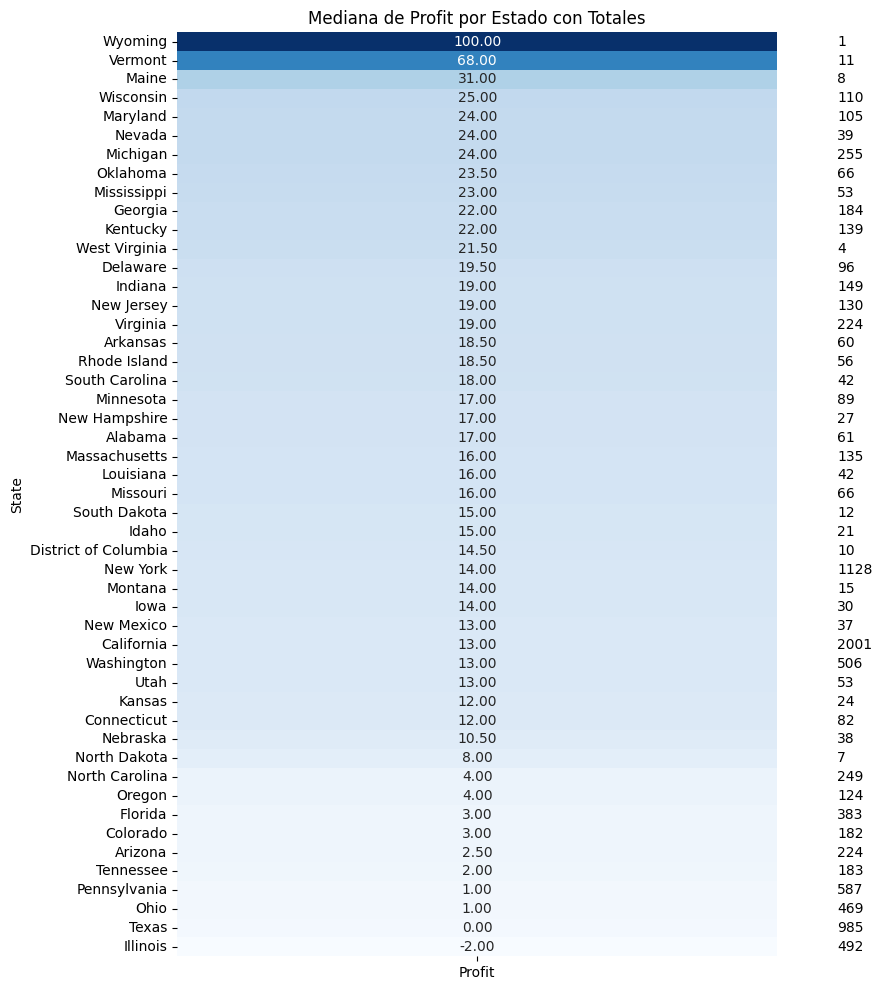

In [15]:
# Crear una tabla pivote con la mediana de 'Profit' por 'State'
pivot_table = df.pivot_table(values='Profit', index='State', aggfunc='median')

# Ordenar la tabla pivote en orden descendente según la mediana
pivot_table_sorted = pivot_table.sort_values(by='Profit', ascending=False)

# Crear una tabla con el total de observaciones por estado
df_totals = df.groupby('State')['Profit'].count()

# Crear el heatmap
fig, ax = plt.subplots(figsize=(10, 12))  # Ajustar el tamaño para que entren todos los estados

# Graficar el heatmap
sns.heatmap(pivot_table_sorted, cmap='Blues', annot=True, fmt=".2f", ax=ax, cbar=False)

# Añadir los totales de observaciones a la derecha
for i, total in enumerate(df_totals.loc[pivot_table_sorted.index]):
    ax.text(1.10, i + 0.5, f'{total}', va='center', ha='left', fontsize=10, color='black', transform=ax.get_yaxis_transform())

# Ajustar el espacio para las etiquetas
plt.subplots_adjust(left=0.3, right=0.9)

# Título del gráfico
plt.title('Mediana de Profit por Estado con Totales')

# Mostrar el gráfico
plt.show()


In [16]:
df.Profit.describe()

count    9994.000000
mean       28.651891
std       234.255712
min     -6600.000000
25%         2.000000
50%         9.000000
75%        29.000000
max      8400.000000
Name: Profit, dtype: float64

### 2.2. **Relación entre `Profit` vs `Category`**  

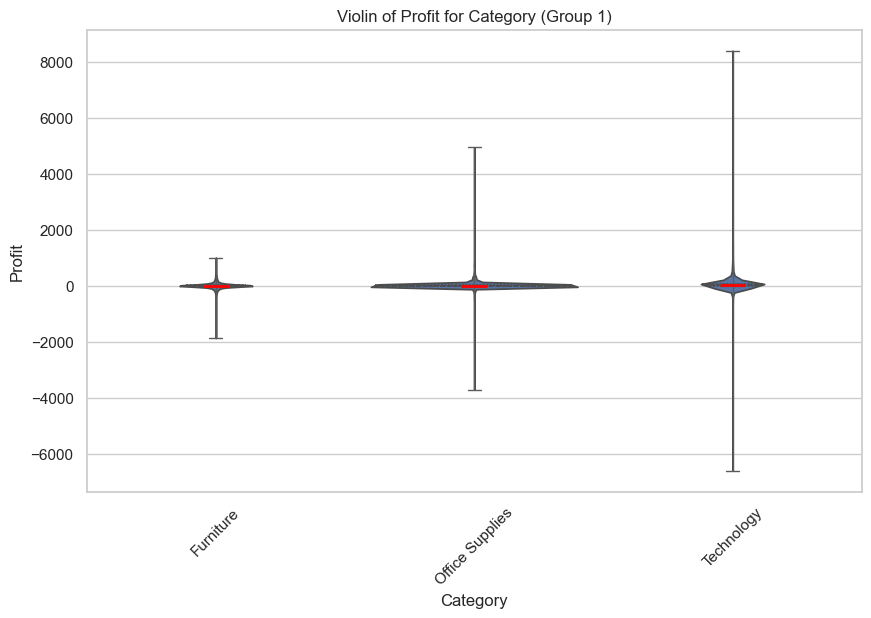

In [21]:
v.plot_grouped_plots(df, 'Category', 'Profit', plot_type='violin', median_color='red')

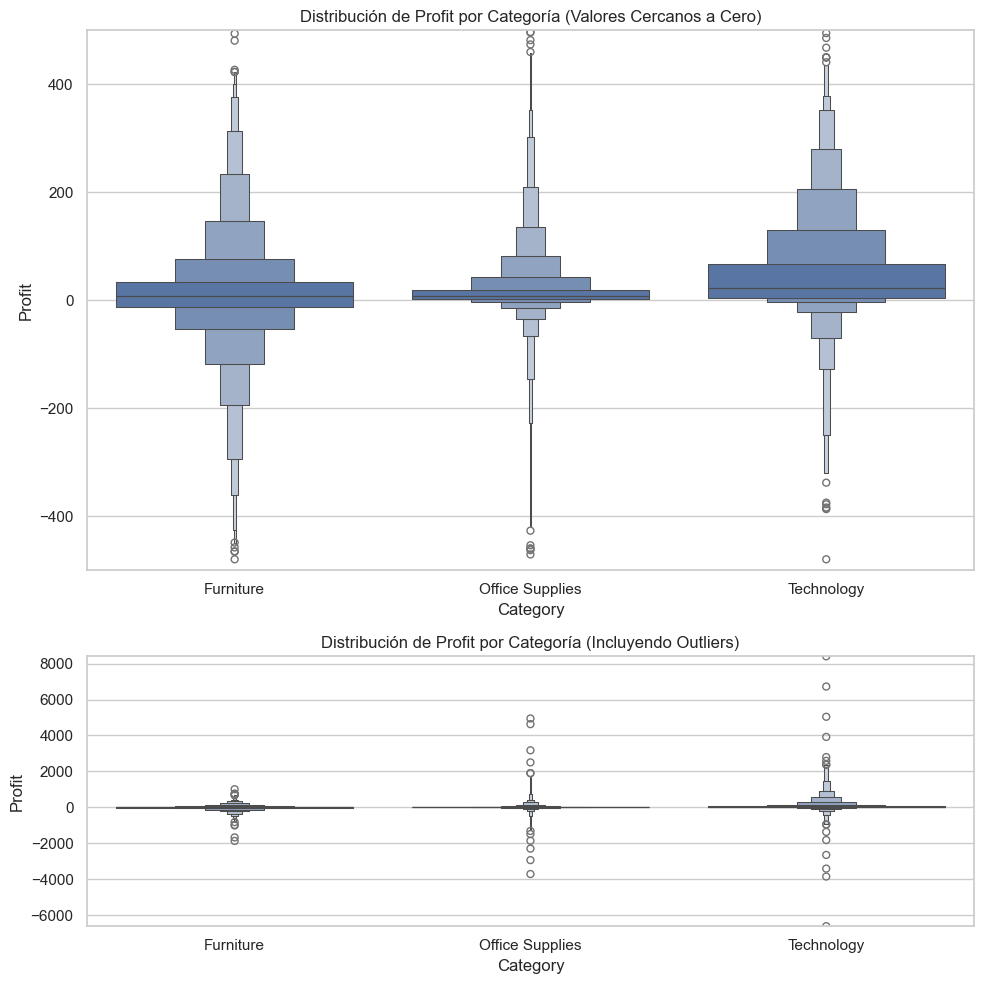

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el umbral para valores cercanos a cero
threshold = 500

# Filtrar los datos cercanos a cero
df_cerca_cero = df[(df['Profit'] >= -threshold) & (df['Profit'] <= threshold)]

# Crear la figura con dos gráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

# Gráfico 1: Valores cercanos a cero
sns.boxenplot(x='Category', y='Profit', data=df_cerca_cero, ax=axes[0])
axes[0].set_title('Distribución de Profit por Categoría (Valores Cercanos a Cero)')
axes[0].set_ylim(-threshold, threshold)

# Gráfico 2: Todos los valores, incluyendo outliers
sns.boxenplot(x='Category', y='Profit', data=df, ax=axes[1])
axes[1].set_title('Distribución de Profit por Categoría (Incluyendo Outliers)')
axes[1].set_ylim(df['Profit'].min(), df['Profit'].max())

# Ajustar el diseño
plt.tight_layout()
plt.show()




### Explicación del gráfico (Rectángulos y tonos de azul):

El gráfico está formado por **rectángulos escalonados** que representan diferentes **percentiles** de la distribución de "Profit" en cada categoría. Este tipo de gráfico, llamado **boxenplot** (o boxplot extendido), ofrece más detalle que un boxplot tradicional, ya que no solo muestra los cuartiles (Q1, Q2, Q3), sino también los **percentiles más extremos**:

- **Rectángulos más oscuros**: Representan las áreas con mayor concentración de datos, cercanas a la mediana (50% de los datos). 
- **Rectángulos más claros**: A medida que los rectángulos se alejan del centro, representan valores más extremos (percentiles bajos y altos), donde los datos son menos frecuentes.

### Análisis de los gráficos

Este gráfico está dividido en dos partes:
1. **Valores cercanos al cero (primer gráfico)**.
2. **Distribución completa de "Profit", incluyendo outliers (segundo gráfico)**.

#### Primer gráfico: **Distribución de Profit por Categoría (Valores Cercanos a Cero)**

Este gráfico se enfoca en los valores de "Profit" dentro del rango de ±400, donde se concentra la mayoría de los datos.

- **Furniture**:
  - La mayoría de los datos están muy cerca del **cero**. Esto indica que los márgenes de profit para esta categoría son pequeños.
  - Hay algunos outliers negativos visibles en el rango cercano a **-400**, lo que sugiere que hay pérdidas ocasionales, pero no extremas.
  
- **Office Supplies**:
  - La categoría tiene una distribución similar a Furniture, pero parece estar un poco más **concentrada** alrededor del cero, lo que indica una distribución más homogénea.
  - También hay outliers negativos cercanos a **-400**, pero menos frecuentes que en "Furniture".
  
- **Technology**:
  - Esta categoría tiene más **variabilidad**. Aunque la mayoría de los datos están cerca del cero, la distribución es más amplia, lo que indica que los márgenes de profit pueden variar más dentro de esta categoría.
  - Hay una concentración más significativa de outliers **positivos y negativos** cercanos a ±400, lo que sugiere una mayor incertidumbre en los márgenes de esta categoría.

#### Segundo gráfico: **Distribución completa de Profit (Incluyendo Outliers)**

Este gráfico muestra la distribución completa, incluidos los outliers más extremos.

- **Furniture**:
  - Existen algunos outliers positivos cercanos a los **4000**, lo que indica que, aunque es raro, se pueden generar profits significativos en esta categoría.
  - En el lado negativo, hay outliers de hasta **-2000**, lo que sugiere que, aunque infrecuente, puede haber pérdidas considerables en algunas transacciones de muebles.

- **Office Supplies**:
  - Hay más outliers negativos que positivos. Los valores más bajos llegan hasta aproximadamente **-4000**, lo que sugiere que en esta categoría se producen pérdidas más extremas que en las otras.
  - Los outliers positivos son moderados, y el valor máximo de profit parece rondar los **2000**.

- **Technology**:
  - Esta categoría muestra los outliers **positivos más altos**, alcanzando un profit máximo de casi **8000**. Esto indica que la categoría de tecnología tiene un mayor potencial para generar profits extremos.
  - Los outliers negativos son menos extremos, aunque alcanzan valores cercanos a los **-4000**. Sin embargo, en comparación con las otras categorías, la proporción de outliers positivos es mucho mayor en tecnología.

### Conclusiones para el negocio:

1. **Furniture**:
   - Los márgenes de profit son generalmente pequeños y concentrados cerca del cero, lo que sugiere que se trata de una categoría con márgenes ajustados.
   - Aunque hay outliers positivos, la categoría presenta un número considerable de outliers negativos, lo que podría significar que las pérdidas ocurren con cierta frecuencia y deben controlarse.

2. **Office Supplies**:
   - Esta categoría parece ser la más homogénea y predecible en términos de profit. Sin embargo, las pérdidas más extremas son más frecuentes aquí que en las otras categorías.
   - Hay menos posibilidad de obtener profits altos, pero las pérdidas extremas sugieren que es necesario revisar la estrategia de ventas para esta categoría.

3. **Technology**:
   - Es la categoría con más **variabilidad**, y tiene el mayor potencial para generar profits altos, alcanzando hasta **8000** en los outliers positivos.
   - Aunque tiene pérdidas, la proporción de ganancias significativas es mucho mayor que en las otras categorías. Esta categoría podría beneficiarse de enfoques de ventas más agresivos, ya que el riesgo parece estar compensado con un mayor potencial de ganancia.

### Siguientes pasos:
- **Controlar pérdidas** en "Office Supplies", ya que las pérdidas extremas son más frecuentes que las ganancias.
- **Revisar la estrategia de "Technology"** para maximizar el potencial de profit y minimizar el riesgo en transacciones de pérdidas.
- **Analizar en detalle los casos de Furniture** donde se obtienen profits elevados, para replicar estas situaciones en otras transacciones.

Este análisis sugiere que las diferentes categorías tienen riesgos y oportunidades distintos, lo que requiere enfoques diferenciados para maximizar el profit y minimizar las pérdidas.
